In [1]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import KFold

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier

from sklearn import tree
from sklearn.tree import export_text
from sklearn.tree import DecisionTreeClassifier 
from dtreeviz.trees import dtreeviz 

from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier

import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance

from sklearn.neural_network import MLPClassifier

## Avoid some version change warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import dataset, and call it 'hr'.

hr = pd.read_csv('50000_HRA_Records.csv')

### Explore dataset

In [3]:
hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,31,No,Non-Travel,158,Software,7,3,Medical,1,1,...,1,80,2,15,1,2,12,4,10,11
1,38,No,Travel_Rarely,985,Human Resources,33,5,Life Sciences,1,2,...,3,80,4,5,4,3,1,1,1,1
2,59,Yes,Non-Travel,1273,Sales,5,2,Technical Degree,1,3,...,2,80,2,9,5,1,6,6,4,3
3,52,Yes,Travel_Rarely,480,Support,2,5,Marketing,1,4,...,2,80,2,22,4,4,10,9,5,6
4,32,No,Non-Travel,543,Human Resources,7,5,Human Resources,1,5,...,4,80,2,30,3,4,29,27,9,7


In [4]:
# The dataset has 50,000 rows and 35 columns
hr.shape

(50000, 35)

In [5]:
#Check the columns to seek out null values, data types and their names
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       50000 non-null  int64 
 1   Attrition                 50000 non-null  object
 2   BusinessTravel            50000 non-null  object
 3   DailyRate                 50000 non-null  int64 
 4   Department                50000 non-null  object
 5   DistanceFromHome          50000 non-null  int64 
 6   Education                 50000 non-null  int64 
 7   EducationField            50000 non-null  object
 8   EmployeeCount             50000 non-null  int64 
 9   EmployeeNumber            50000 non-null  int64 
 10  EnvironmentSatisfaction   50000 non-null  int64 
 11  Gender                    50000 non-null  object
 12  HourlyRate                50000 non-null  int64 
 13  JobInvolvement            50000 non-null  int64 
 14  JobLevel              

In [6]:
# Check for duplicates, in which case, there is none.
hr[hr.duplicated() == True]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


In [7]:
hr.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.0,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.0,50000.000000,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000
mean,38.971480,798.677560,25.539780,3.004600,1.0,25000.500000,2.498360,115.432940,2.502620,2.994640,...,2.502220,80.0,2.503780,20.496860,3.493980,2.49872,10.77110,5.907300,5.871820,5.889040
std,12.420834,405.080217,14.339956,1.414249,0.0,14433.901067,1.119671,49.424867,1.120544,1.415998,...,1.117918,0.0,1.118933,11.575819,1.708152,1.11412,8.93423,6.034378,5.999056,6.009613
min,18.000000,100.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000
25%,28.000000,445.000000,13.000000,2.000000,1.0,12500.750000,1.000000,73.000000,1.000000,2.000000,...,2.000000,80.0,2.000000,11.000000,2.000000,2.00000,3.00000,1.000000,2.000000,1.000000
50%,39.000000,798.000000,25.000000,3.000000,1.0,25000.500000,2.000000,116.000000,3.000000,3.000000,...,2.000000,80.0,3.000000,20.000000,3.000000,2.00000,8.00000,4.000000,4.000000,4.000000
75%,50.000000,1151.000000,38.000000,4.000000,1.0,37500.250000,4.000000,158.000000,4.000000,4.000000,...,4.000000,80.0,4.000000,31.000000,5.000000,3.00000,16.00000,8.000000,8.000000,8.000000
max,60.000000,1500.000000,50.000000,5.000000,1.0,50000.000000,4.000000,200.000000,4.000000,5.000000,...,4.000000,80.0,4.000000,40.000000,6.000000,4.00000,40.00000,40.000000,40.000000,40.000000


In [9]:
# Check for the count of variables in each column
hr.nunique()

Age                            43
Attrition                       2
BusinessTravel                  3
DailyRate                    1401
Department                      6
DistanceFromHome               50
Education                       5
EducationField                  6
EmployeeCount                   1
EmployeeNumber              50000
EnvironmentSatisfaction         4
Gender                          2
HourlyRate                    171
JobInvolvement                  4
JobLevel                        5
JobRole                        10
JobSatisfaction                 4
MaritalStatus                   3
MonthlyIncome               31682
MonthlyRate                 46900
NumCompaniesWorked              9
Over18                          1
OverTime                        2
PercentSalaryHike              50
PerformanceRating               4
RelationshipSatisfaction        4
StandardHours                   1
StockOptionLevel                4
TotalWorkingYears              40
TrainingTimesL

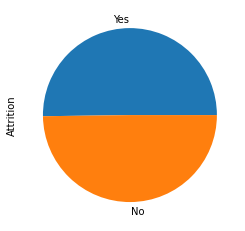

In [10]:
# Breakdown the attrition countusing a pie chart
hr.Attrition.value_counts().plot.pie();

In [11]:
# Change object into integer by mapping the the objects to numeric value.
hr['Attrition'] = hr.Attrition.map({"No": 0, "Yes":1})

In [12]:
hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,31,0,Non-Travel,158,Software,7,3,Medical,1,1,...,1,80,2,15,1,2,12,4,10,11
1,38,0,Travel_Rarely,985,Human Resources,33,5,Life Sciences,1,2,...,3,80,4,5,4,3,1,1,1,1
2,59,1,Non-Travel,1273,Sales,5,2,Technical Degree,1,3,...,2,80,2,9,5,1,6,6,4,3
3,52,1,Travel_Rarely,480,Support,2,5,Marketing,1,4,...,2,80,2,22,4,4,10,9,5,6
4,32,0,Non-Travel,543,Human Resources,7,5,Human Resources,1,5,...,4,80,2,30,3,4,29,27,9,7


In [13]:
# Check the count of content in this column
hr.BusinessTravel.value_counts()

Non-Travel           16919
Travel_Frequently    16593
Travel_Rarely        16488
Name: BusinessTravel, dtype: int64

In [14]:
# Change object into integer by mapping the the objects to numeric value.
hr['BusinessTravel'] = hr.BusinessTravel.map({"Non-Travel": 0, "Travel_Rarely": 1, "Travel_Frequently": 2})

In [15]:
# map the object to numeric value
hr['Gender'] = hr.Gender.map({"Female": 0, "Male": 1})

In [16]:
# Check the count of content in this column
hr.MaritalStatus.value_counts()

Single      16703
Married     16681
Divorced    16616
Name: MaritalStatus, dtype: int64

In [17]:
# Change object into integer by mapping the the objects to numeric value.
hr['MaritalStatus'] = hr.MaritalStatus.map({"Single": 0, "Divorced": 1, "Married": 2})

In [18]:
# Check the count of content in this column
hr.Department.value_counts()

Sales                     8453
Human Resources           8418
Software                  8336
Research & Development    8319
Support                   8305
Hardware                  8169
Name: Department, dtype: int64

In [19]:
# Label encoding for objects in the rest of the columns by converting them into numeric values
le = preprocessing.LabelEncoder()
hr["Department"] = le.fit_transform(hr.Department)
hr["EducationField"] = le.fit_transform(hr.EducationField)
hr["JobRole"] = le.fit_transform(hr.JobRole)
hr["OverTime"] = le.fit_transform(hr.OverTime)

In [20]:
# Drop columns that are not useful or won't make an impact
hr.drop(["EmployeeCount", "EmployeeNumber", "Over18", "StandardHours"], axis=1, inplace=True)

In [21]:
# Check the columns and theyr data types to make sure all are converted into numeric values in order \
# to run machine learning algorithms

hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       50000 non-null  int64
 1   Attrition                 50000 non-null  int64
 2   BusinessTravel            50000 non-null  int64
 3   DailyRate                 50000 non-null  int64
 4   Department                50000 non-null  int32
 5   DistanceFromHome          50000 non-null  int64
 6   Education                 50000 non-null  int64
 7   EducationField            50000 non-null  int32
 8   EnvironmentSatisfaction   50000 non-null  int64
 9   Gender                    50000 non-null  int64
 10  HourlyRate                50000 non-null  int64
 11  JobInvolvement            50000 non-null  int64
 12  JobLevel                  50000 non-null  int64
 13  JobRole                   50000 non-null  int32
 14  JobSatisfaction           50000 non-nu

In [22]:
# Define X (features) and y (target)
X = hr.drop("Attrition", axis=1)
y = hr.Attrition

In [23]:
# Run logistic regression as a base model to test the dataset to make sure it is a reliable dataset in which case,\
# it's bogus because the cross value score is too low.

lr = LogisticRegression()
np.mean(cross_val_score(lr, X, y, cv=3))

0.4993799307981199